<h2> Airbnb Seattle versus Boston </h2>


How does Airbnb rental market different between Seattle and Boston ?

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option('precision', 5)


import src.data.rental_calendar as cal
import src.data.listings as lst
import src.data.reviews as rev
import src.data.rental_calendar as cal
import src.data.util as util

# https://www.airdna.co

In [2]:
def load_and_clean_data(city):
    """Load the listing dataset from csv file, convert zipcode and price into numeric types
      Parameter: 
          city: city name
      Return: Pandas DataFrame
    """
    datafile =f'../data/raw/{city}/listings.csv'
    listings = lst.Listings(datafile, city)
    listings_df = listings.process_zipcode(listings.df)
    listings_df = listings.convert_price(listings_df)
    return listings_df

**Load Seattle listings data**

In [3]:
city = 'seattle'
seattle_listings_df = load_and_clean_data(city)

In [4]:
seattle_listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
seattle_listings_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

**Load Boston listings data**

In [6]:
city = 'boston'
boston_listings_df = load_and_clean_data(city)

In [7]:
boston_listings_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

### Question 1

What are the top 10 neighbourhoods for listing rentals from both cities ? 

(81,)


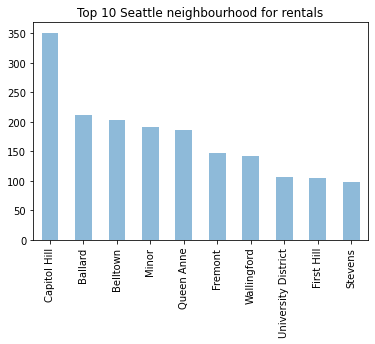

In [8]:
seattle_listings_by_neighbourhood = seattle_listings_df['neighbourhood'].value_counts()
print(seattle_listings_by_neighbourhood.shape)
seattle_listings_by_neighbourhood[:10].plot(kind='bar', title='Top 10 Seattle neighbourhood for rentals',  alpha=.5);

The Captical Hill in Seattle had almost twice of listings than the number two neighourhood Ballard. 

(30,)


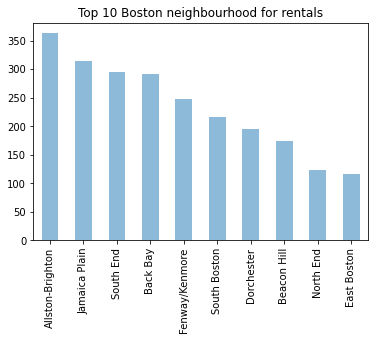

In [9]:
boston_listings_by_neighbourhood = boston_listings_df['neighbourhood'].value_counts()
print(boston_listings_by_neighbourhood.shape)
boston_listings_by_neighbourhood[:10].plot(kind='bar', title='Top 10 Boston neighbourhood for rentals',  alpha=.5);

The listings from Boston were more linearly distributed among the top 10 neighourhoods.

In [10]:
print('Seattle top 10 neighbourhood counts for {}% of rental listings'.format( round(seattle_listings_by_neighbourhood[:10].sum()/seattle_listings_df.shape[0] * 100, 2)))


Seattle top 10 neighbourhood counts for 45.81% of rental listings


In [11]:
print('Boston top 10 neighbourhood counts for {}% of rental listings'.format( round(boston_listings_by_neighbourhood[:10].sum()/boston_listings_df.shape[0] * 100, 2)))

Boston top 10 neighbourhood counts for 65.91% of rental listings


### Question 2

Active Rentals by room type: Entire room, private room and shared room

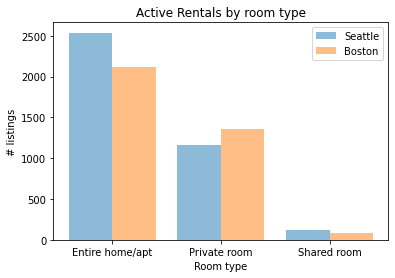

In [12]:
# make a bar chart with data from both cities
sea_by_room_type = seattle_listings_df['room_type'].value_counts().to_frame('seattle_listings')
bos_by_room_type = boston_listings_df['room_type'].value_counts().to_frame('boston_listings')
by_room_types = sea_by_room_type.join(bos_by_room_type, on=sea_by_room_type.index)

X_axis = np.arange(len(sea_by_room_type.index))

plt.bar(X_axis - 0.2, by_room_types['seattle_listings'],0.4,  label="Seattle", alpha=.5)
plt.bar(X_axis + 0.2, by_room_types['boston_listings'], 0.4, label="Boston", alpha=.5)
plt.xticks(X_axis, sea_by_room_type.index)
plt.xlabel('Room type')
plt.ylabel(f'# listings')
plt.title(f'Active Rentals by room type')
plt.legend()
  

In both cities, the availability of entire home/apartment is comparable. For private room, Boston has more.t isn't surprising to see that the shared room has the smallest share of the market.

### Question 3

Are luxary rentals long term rentals ?

In [13]:
def calender_load_clean(city):
    """Load calendar dataset from csv file and process price and available columns
      Parameter:
          city - city name
      Return: Pandas DataFrame
    """
    datafile = f'../data/raw/{city}/calendar.csv'
    cals = cal.RentalCalendar(datafile, city)
    cals_df = cals.convert_price(cals.df)
    cals_df = cals.convert_available(cals_df)
    return cals_df


sea_cals = calender_load_clean('seattle')
bos_cals = calender_load_clean('boston')

In [15]:
import math
def plot_availability(city, data, bin_size=10):
    """Produce a histogram plot for number of days available for luxary rentals
      Parameters:
        city: city name
        data: rental listings data
        bin_size: number of bins
    """
    bins = np.linspace(math.ceil(min(data)), 
               math.floor(max(data)),
               bin_size) 

    plt.xlim([min(data), max(data)])
    plt.hist(data, bins=bins, alpha=0.5)
    plt.title(f'{city} - Luxary rental availability ')
    plt.xlabel(f'days')
    plt.ylabel('count')

In [16]:
sea_luxe_ids = sea_cals[sea_cals.price >= sea_cals.price.quantile(0.99)]['listing_id'].unique()
sea_luxe_avail = [sea_cals[sea_cals.listing_id == lid]['available'].sum() for lid in sea_luxe_ids]

In [17]:
print('Seattle, total {} listings with price above price ${}'.format(len(sea_luxe_avail), sea_cals.price.quantile(0.99)))

Seattle, total 64 listings with price above price $550.0


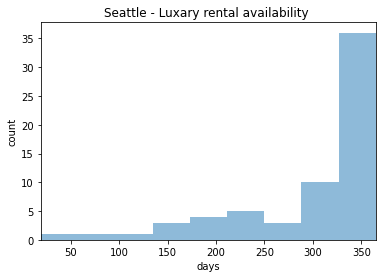

In [18]:
plot_availability('Seattle', sea_luxe_avail)

In [19]:
bos_luxe_ids = bos_cals[bos_cals.price >= bos_cals.price.quantile(0.99)]['listing_id'].unique()
bos_luxe_avail = [bos_cals[bos_cals.listing_id == lid]['available'].sum() for lid in bos_luxe_ids]

In [20]:
print('Boston, total {} listings with price above price ${}'.format(len(bos_luxe_ids), bos_cals.price.quantile(0.99)))

Boston, total 159 listings with price above price $725.0


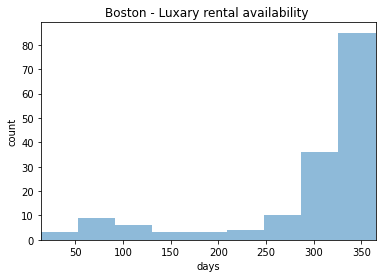

In [21]:
plot_availability('Boston', bos_luxe_avail)

Based on data, good portion of these luxuary properties were indeed long term and available all year long. This begs a question, is there any advantage of renting them through Airbnb versus renting them via local property management company?

### Question 4

For hosts with higher response rate, did they get higher review ratings ?

In [22]:
# Load listings and reviews data
city = 'seattle'
sea_revs = rev.Reviews(f'../data/raw/{city}/reviews.csv', city)
sea_listings = lst.Listings(f'../data/raw/{city}/listings.csv', city)

In [23]:
# join listings and reviews data
full_reviews = sea_revs.combined_reviews_and_scores(sea_listings)

In [24]:
rev_host_rep_rate = full_reviews[['host_response_rate', 'review_scores_rating']].copy()

# remove missing values so that we can convert it to numeric type
rev_host_rep_rate = rev_host_rep_rate.dropna(how='any')

# convert host_response_rate to numeric type
rev_host_rep_rate['host_response_rate'] = rev_host_rep_rate['host_response_rate'].apply(lambda x: str(x).replace('%', '')).astype(float)
rev_host_rep_rate[:2]

,host_response_rate,review_scores_rating
0,100.0,95.0
1,100.0,95.0


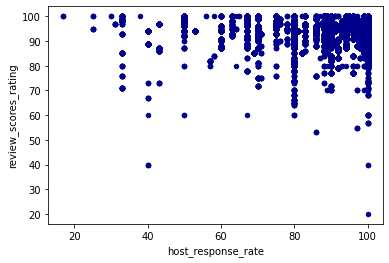

In [25]:
# plot host_response_rate and review_scores_rating 
rev_host_rep_rate.plot.scatter(x='host_response_rate', y='review_scores_rating', c='DarkBlue');                 

More reviews were submitted when response rate were higher. However higher rate review score can be achived with hands-off.